<a href="https://colab.research.google.com/github/UnitForDataScience/Homelessness_Clustering_Comparisons/blob/master/Homelessness_Clustering_Algorithm_Comparisons_(Unsupervised_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

OBJECTIVE:

This project consists of 4 distinct tasks revolving around a dataset tracking the services used by homeless people in Maricopa county, Arizona. The overarching objective was to design a risk model that assessed the likelihood of people falling back into homelessness after utilizing certain services. An essential component of this was to identify natural clusters of usage patterns within the data. This allowed us to observe how distinct groups of people flowed through the system and to identify success stories within the data. While our team settled on the BIRCH algorithm, we are interested in identifying other clustering algorithms that may be more efficient or may tell us an interesting story from the data. We are interested in any approach identified.

The tasks of this project are as follows: 

1.   Compare the performance and output of various clustering algorithms 
2.   Implementation of hyperparameter optimization of any clustering algorithm of choice
3.   Identify an optimal number of clusters
4.   Assess different distance metrics for computing similarity

<br>

For more information on the fundamentals of data clustering, please see the following hyperlink:

https://en.wikipedia.org/wiki/Cluster_analysis

<br>

Please note that the code snippets in the "Data Import and Initialization" section must be executed before any subsequent section can be run.

---


# Data Import and Initialization

DATA DESCRIPTION: 

Data is comprised of usage statistics of a majority of homeless service in Maricopa County, AZ from January 1st, 2014 to December 30th, 2018. Each row represents a unique person (identified by the first column, "personalid") and captures their total usage of each service within the aforementioned timeframe. The only exception is the second column labeled "projecttype_1_bednights", which captures the total number of nights spent in project type 1 only. Please click the following hyperlink to see the data in its raw form: 

https://raw.githubusercontent.com/djlittle/Homelessness_Clustering_Comparisons/master/Data/HMIS%20Data%20Extract.csv


In [3]:
# General package imports

import pandas as pd
import numpy as np
import time

print('Imports completed successfully')

Imports completed successfully


In [4]:
# Data load

url = 'https://raw.githubusercontent.com/djlittle/Homelessness_Clustering_Comparisons/master/Data/HMIS%20Data%20Extract.csv'

dat = pd.read_csv(url) # Importing data

print(dat.head())


   personalid  projecttype_1_bednights  projecttype_1_count  \
0         342                     91.0                  4.0   
1         401                      2.0                  2.0   
2         402                      NaN                  NaN   
3         424                      5.0                  5.0   
4         438                    220.0                199.0   

   projecttype_2_count  projecttype_3_count  projecttype_4_count  \
0                  NaN                  NaN                  NaN   
1                  NaN                  1.0                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  1.0   

   projecttype_6_count  projecttype_7_count  projecttype_8_count  \
0                  NaN                  2.0                  NaN   
1                  1.0                  1.0                  NaN   
2       

In [5]:
# Dataframe manipulation and nan handling

processing_times = pd.DataFrame()  # For assessing each algorithm's processing times

df = dat.iloc[:, 1:]
df.fillna(0, inplace=True) # Filling null values of the data frame with -1. 
# Other approaches to null handling are also of interest here.

print(df.head())

   projecttype_1_bednights  projecttype_1_count  projecttype_2_count  \
0                     91.0                  4.0                  0.0   
1                      2.0                  2.0                  0.0   
2                      0.0                  0.0                  0.0   
3                      5.0                  5.0                  0.0   
4                    220.0                199.0                  0.0   

   projecttype_3_count  projecttype_4_count  projecttype_6_count  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  1.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  1.0   
4                  0.0                  1.0                  2.0   

   projecttype_7_count  projecttype_8_count  projecttype_10_count  \
0                  2.0                  0.0                   0.0   
1                  1

---
# Clustering Models Assessment

This section is for the implementation of cluster algorithms. Here we implemented the KMEANS, DBSCAN, and BIRCH algorithms through the scikit package (linked above) for example. Our team settled on utilizing the BIRCH algorithm for our preliminary results. However, there are many options here worth exploring!

<br>

For more information on specific clustering approaches, please visit the following: 

https://scikit-learn.org/stable/modules/clustering.html#clustering


In [7]:
# Kmeans 

from sklearn.cluster import KMeans

start = time.time()
kmeans = KMeans(n_clusters=10, verbose=True).fit(df) # Model fitting
kmeans_labels = kmeans.labels_ + 1  # Label assignment
end = time.time()

processing_times['kmeans'] = [(end - start)] # Computing processing time

dat['kmeans'] = kmeans_labels # Attaching labels to original dataframe

print('Kmeans model complete')
print('Processing time: '+ str(processing_times['kmeans'][0]) + ' seconds')

Initialization complete
Iteration 0, inertia 2526314.0
Iteration 1, inertia 2197030.2120344685
Iteration 2, inertia 2184242.235044306
Iteration 3, inertia 2177467.738026664
Iteration 4, inertia 2172655.622837045
Iteration 5, inertia 2169334.398677277
Iteration 6, inertia 2165046.3724073614
Iteration 7, inertia 2161704.0806040154
Iteration 8, inertia 2159765.116731957
Iteration 9, inertia 2157232.11299858
Iteration 10, inertia 2153393.2025756203
Iteration 11, inertia 2152357.570893515
Iteration 12, inertia 2150999.4845831776
Iteration 13, inertia 2148609.6451184144
Iteration 14, inertia 2144479.8282357254
Iteration 15, inertia 2143992.3493365273
Iteration 16, inertia 2143719.1670572963
Iteration 17, inertia 2143119.7052073395
Iteration 18, inertia 2142866.9955402426
Iteration 19, inertia 2142849.4502149723
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 2414227.0
Iteration 1, inertia 2141905.598502027
Iteration 2, inertia 2108206.3115337463
It

In [10]:
# DBSCAN 

from sklearn.cluster import DBSCAN

start = time.time()
dbscan = DBSCAN(eps=2.5, min_samples=10).fit(df) # Model fitting
dbscan_labels = dbscan.labels_ + 1 # Label assignment
end = time.time()

processing_times['dbscan'] = [(end - start)] # Computing processing time

dat['dbscan'] = dbscan_labels # Attaching labels to original dataframe

print('DBSCAN model complete')
print('Processing time: '+ str(processing_times['dbscan'][0]) + ' seconds')


DBSCAN model complete
Processing time: 16.886077165603638 seconds


In [9]:
# Birch algorithm

from sklearn.cluster import Birch

start = time.time()
birch = Birch(branching_factor=1000, n_clusters=10, threshold=1.5).fit(df) # Model fitting
birch_labels = birch.labels_+1 # Label assignment
end = time.time()

processing_times['birch'] = [(end - start)] # Computing processing time

dat['birch'] = birch_labels # Attaching labels to original dataframe

print('BIRCH model complete')
print('Processing time: '+ str(processing_times['birch'][0]) + ' seconds')

BIRCH model complete
Processing time: 2.2621164321899414 seconds


In [11]:
# Comparing clusters

print(processing_times) # Print of vector containing process times

unique, counts = np.unique(kmeans_labels, return_counts=True) # Returning counts of each cluster 
kmeans_clusters = dict(zip(unique, counts)) # Organizing counts
print(kmeans_clusters)  # Output to user 

unique, counts = np.unique(dbscan_labels, return_counts=True)
dbscan_clusters = dict(zip(unique, counts))
print(dbscan_clusters)

unique, counts = np.unique(birch_labels, return_counts=True)
birch_clusters = dict(zip(unique, counts))
print(birch_clusters)

     kmeans     dbscan     birch
0  3.594562  16.886077  2.262116
{1: 95, 2: 22815, 3: 1082, 4: 244, 5: 1497, 6: 71, 7: 433, 8: 1112, 9: 1946, 10: 50}
{0: 988, 1: 28104, 2: 17, 3: 15, 4: 103, 5: 31, 6: 19, 7: 35, 8: 10, 9: 11, 10: 12}
{1: 2548, 2: 200, 3: 48, 4: 1234, 5: 37, 6: 24714, 7: 41, 8: 449, 9: 57, 10: 17}


---
# Hyperparameter Optimization

As a secondary task, build a framework that optimizes the parameters of any of the clustering algorithms implemented above. This can be done through grid search, random search, or even manually adjusting parameters on your own. For more information on hyperparameter optimization, please see the following: 

https://en.wikipedia.org/wiki/Hyperparameter_optimization

The objective function to optimize for this project could be to maximize the cluster purity. See the following on assessing cluster purity: 

https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html

However, other cluster evaluation metrics are possible. 



In [ ]:
# Code block for hyperparameter optimization

# Optimal Cluster Size Assessment

Aside from assessing the purity of each cluster, how do we know what is the ideal number of "K" clusters to build our algorithm on? This section is for exploring just that. 

Here, we implemented the elbow method for identifying the optimal cluster size. However, there are many more methods to assess optimal number of clusters. See the following link for more information:

https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set




Beginning k = 2
Beginning k = 3
Beginning k = 4
Beginning k = 5
Beginning k = 6
Beginning k = 7
Beginning k = 8
Beginning k = 9
Beginning k = 10
Beginning k = 11
Beginning k = 12
Beginning k = 13
Beginning k = 14
Beginning k = 15
Beginning k = 16
Beginning k = 17
Beginning k = 18
Beginning k = 19
Beginning k = 20
Beginning k = 21
Beginning k = 22
Beginning k = 23
Beginning k = 24
Beginning k = 25
Beginning k = 26
Beginning k = 27
Beginning k = 28
Beginning k = 29
Beginning k = 30
Beginning k = 31
Beginning k = 32
Beginning k = 33
Beginning k = 34
Beginning k = 35
Beginning k = 36
Beginning k = 37
Beginning k = 38
Beginning k = 39
Beginning k = 40
Beginning k = 41
Beginning k = 42
Beginning k = 43
Beginning k = 44
Beginning k = 45
Beginning k = 46
Beginning k = 47
Beginning k = 48
Beginning k = 49


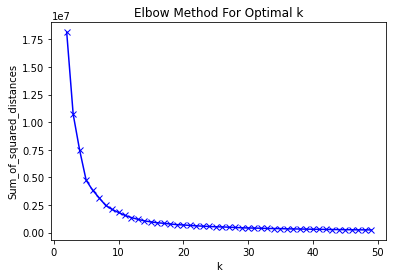

In [13]:
from matplotlib import pyplot as plt  # Import for graphing

# Elbow method for assessing k number of clusters
wcss = [] # Null dataframe to store sum of squared distances
K = range(2, 50)  # Range to assess
for k in K:
    print("Beginning k = " + str(k))
    kmeans_k = KMeans(n_clusters=k).fit(df) # Fitting to k number of clusters
    wcss.append(kmeans_k.inertia_) # Storing data

# Elbow methog graphing
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

---

# Distance Metric Evaluation

In general, clustering algorithms assess the similarity between objects by way of a distance metric. In 3D space, this is most commonly computed by way of the Euclidean distance. In 2D space we known this as Pythagoras' Theorem. However, does this work for every situation? What do we do when our data isn’t comprised of physical distance measurements? What do we do in situations where we have non-numeric categories? This section is designed to explore different distance metrics and the impact they have on cluster assignment.

<br>

Below are two identical implementations of a hierarchical clustering algorithm with one exception; the distance metric has been changed from Euclidean to Hamming distance. Your task is to implement other distance metrics of your choice and observe the changes in the resulting dendrograms. For this section, the hierarchical clustering routine and dendrogram were chosen for ease of visualization of the resulting cluster assignments. If you are unfamiliar with these techniques, please refer to the following: 

https://en.wikipedia.org/wiki/Hierarchical_clustering  

https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hierarchical_Clustering-Dendrograms.pdf   

<br>
   
Options for distance metrics in this specific package implementation are as follows: 

‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’

<br>

More detail on the computations of the above distances for the scipy package implementation can be found here: 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist

<br>

Please note that a random sample is performed to here simplify computations and visualizations.


In [14]:
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

sample_size = 100 # Random sample of 100 points from original dataset

df_sub = dat.iloc[:, 1:].sample(n=sample_size) # Sampling function
df_sub.fillna(-1, inplace=True) # Null value handling same as above

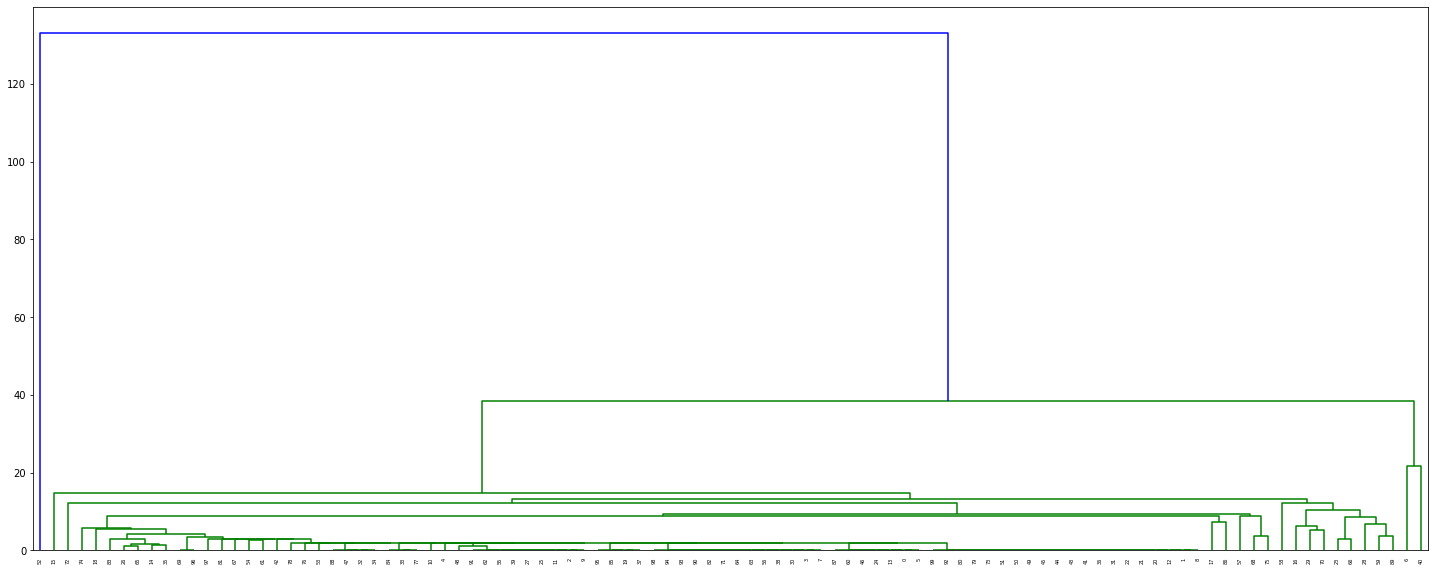

In [15]:
# Euclidean Distance

link_euclidean = hierarchy.linkage(df_sub, method='single', metric='euclidean')

fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(link_euclidean)
plt.show()

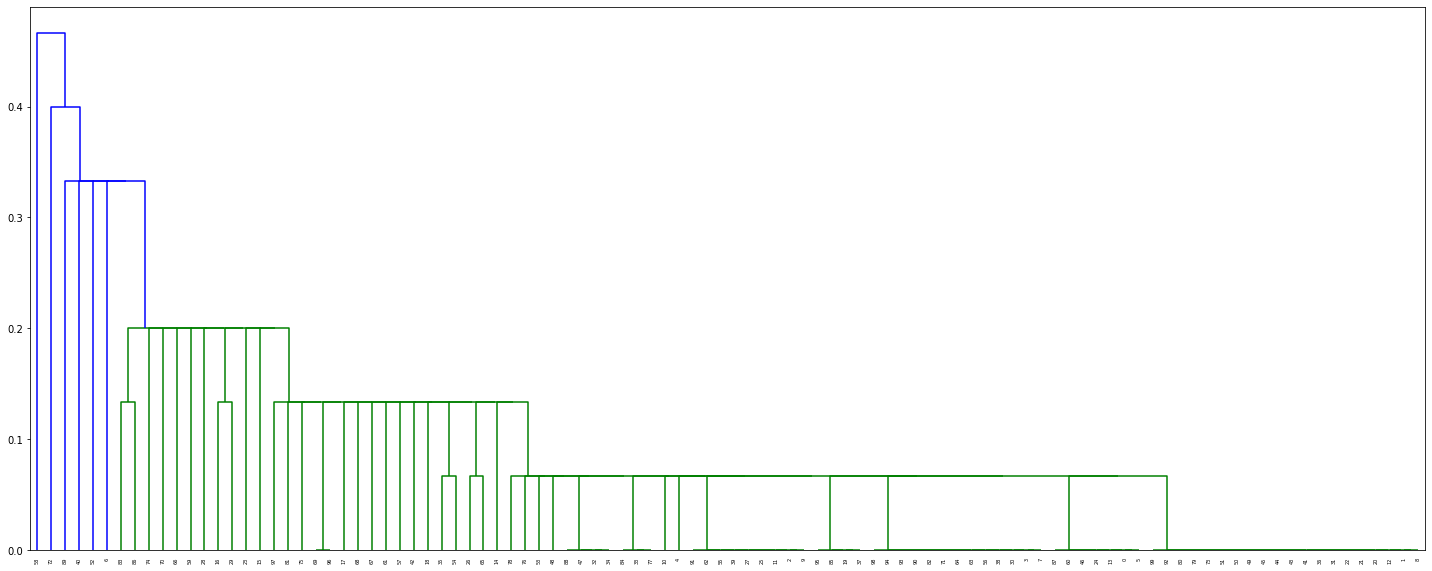

In [16]:
# Repeated call with Hamming distance instead

link_hamming = hierarchy.linkage(df_sub, method='single', metric='hamming')

fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(link_hamming)
plt.show()